In [1]:
#importing the required librabries
import pandas as pd 
import numpy as np

In [2]:
#loading the data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/File/Marketing Campaign data.csv')
data.head()

Mounted at /content/drive


,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,COMMENTS
0,101501,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0,Shopping at your store is a hassle. I rarely s...
1,101502,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0,Affinity card is great. I think it is a hassle...
2,101503,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0,"I purchased a new computer recently, but the m..."
3,101504,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0,Affinity card is great. I think it is a hassle...
4,101505,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0,Why didn't you start a program like this befor...


In [3]:
#dataframe
df = pd.DataFrame(data)

Data understanding

In [4]:
#Produce a meta data table to show characteristics of each attribute.
#data info
df.info()

#data columns description
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_ID                  1500 non-null   int64 
 1   CUST_GENDER              1500 non-null   object
 2   AGE                      1500 non-null   int64 
 3   CUST_MARITAL_STATUS      1500 non-null   object
 4   COUNTRY_NAME             1500 non-null   object
 5   CUST_INCOME_LEVEL        1500 non-null   object
 6   EDUCATION                1500 non-null   object
 7   OCCUPATION               1500 non-null   object
 8   HOUSEHOLD_SIZE           1500 non-null   object
 9   YRS_RESIDENCE            1500 non-null   int64 
 10  AFFINITY_CARD            1500 non-null   int64 
 11  BULK_PACK_DISKETTES      1500 non-null   int64 
 12  FLAT_PANEL_MONITOR       1500 non-null   int64 
 13  HOME_THEATER_PACKAGE     1500 non-null   int64 
 14  BOOKKEEPING_APPLICATION  1500 non-null  

Index(['CUST_ID', 'CUST_GENDER', 'AGE', 'CUST_MARITAL_STATUS', 'COUNTRY_NAME',
       'CUST_INCOME_LEVEL', 'EDUCATION', 'OCCUPATION', 'HOUSEHOLD_SIZE',
       'YRS_RESIDENCE', 'AFFINITY_CARD', 'BULK_PACK_DISKETTES',
       'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE', 'BOOKKEEPING_APPLICATION',
       'PRINTER_SUPPLIES', 'Y_BOX_GAMES', 'OS_DOC_SET_KANJI', 'COMMENTS'],
      dtype='object')

In [5]:
# the number of rows and columns of the df
df.shape

(1500, 19)

In [ ]:
#	Describe missing or error data of each attribute
#Comments has null values
#Occupation has ? values
# Marital status has abbreviated words

Data preparation

In [6]:
#	Write Python programs to reduce variables with justifications and comments 
#(e.g remove variables with no influences on the target variable and COMMENTS which requires dedicated text mining tools) 

#new dataframe without customer id and comments
ndf = df[[ 'CUST_GENDER', 'AGE', 'CUST_MARITAL_STATUS', 'COUNTRY_NAME',
       'CUST_INCOME_LEVEL', 'EDUCATION', 'OCCUPATION', 'HOUSEHOLD_SIZE',
       'YRS_RESIDENCE', 'AFFINITY_CARD', 'BULK_PACK_DISKETTES',
       'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE', 'BOOKKEEPING_APPLICATION',
       'PRINTER_SUPPLIES', 'Y_BOX_GAMES', 'OS_DOC_SET_KANJI']].copy()
ndf.head()

#Customer ID and Comments columns were removed because they have no influence on the target variable

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0
1,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0
2,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0
3,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0
4,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0


In [7]:
ndf.shape

(1500, 17)

In [8]:
#Write Python programs to clean data with justifications and comments (e.g remove records with missing values or errors) 

# 1. Remove ? in OCCUPATION columnn
ndf.drop(ndf[ndf['OCCUPATION']=='?'].index,inplace = True)
o = ndf['OCCUPATION'].unique()
o

array(['Prof.', 'Sales', 'Cleric.', 'Exec.', 'Other', 'Farming',
       'Transp.', 'Machine', 'Crafts', 'Handler', 'Protec.', 'TechSup',
       'House-s', 'Armed-F'], dtype=object)

In [9]:
# 2. Change abbreviated words in MARITAL STATUS column
ms =ndf['CUST_MARITAL_STATUS'].unique()
ms

array(['NeverM', 'Married', 'Divorc.', 'Mabsent', 'Separ.', 'Widowed'],
      dtype=object)

In [10]:
# use replace by dictionary
ndf['CUST_MARITAL_STATUS'] = ndf['CUST_MARITAL_STATUS']. replace({'NeverM':'NeverMarried','Divorc.':'Divorced','Mabsent':'Maritalstatusabsent',
                                                                  'Separ.':'Separated',})
ndf['CUST_MARITAL_STATUS'].unique()

array(['NeverMarried', 'Married', 'Divorced', 'Maritalstatusabsent',
       'Separated', 'Widowed'], dtype=object)

In [11]:
#check null
ndf.isnull().values.any()

False

In [12]:
ndf.shape

(1420, 17)

In [13]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_GENDER              1420 non-null   object
 1   AGE                      1420 non-null   int64 
 2   CUST_MARITAL_STATUS      1420 non-null   object
 3   COUNTRY_NAME             1420 non-null   object
 4   CUST_INCOME_LEVEL        1420 non-null   object
 5   EDUCATION                1420 non-null   object
 6   OCCUPATION               1420 non-null   object
 7   HOUSEHOLD_SIZE           1420 non-null   object
 8   YRS_RESIDENCE            1420 non-null   int64 
 9   AFFINITY_CARD            1420 non-null   int64 
 10  BULK_PACK_DISKETTES      1420 non-null   int64 
 11  FLAT_PANEL_MONITOR       1420 non-null   int64 
 12  HOME_THEATER_PACKAGE     1420 non-null   int64 
 13  BOOKKEEPING_APPLICATION  1420 non-null   int64 
 14  PRINTER_SUPPLIES         1420 non-null  

In [14]:
#Write Python programs to transform variable into the following:

#a)	CUST_GENDER into binary F - 0, M -1
ge = {'F': 0, 'M': 1}
ndf['CUST_GENDER'] = ndf['CUST_GENDER'].map(ge)
ndf.head()

#use pandas map() method 

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverMarried,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0
1,1,27,NeverMarried,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0
2,0,20,NeverMarried,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0
3,1,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0
4,1,34,NeverMarried,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0


In [15]:
#b)	COUNTRY_NAME into ordinal number based on their occurrence in the data set in descending order.
c = ndf["COUNTRY_NAME"].value_counts()
print(c)

United States of America    1277
Argentina                     44
Italy                         34
Brazil                        13
Germany                        8
Poland                         7
Canada                         6
United Kingdom                 6
Saudi Arabia                   5
Singapore                      4
Denmark                        4
New Zealand                    3
Japan                          2
China                          2
South Africa                   1
Australia                      1
France                         1
Turkey                         1
Spain                          1
Name: COUNTRY_NAME, dtype: int64


In [16]:
#values stored in a dictionary and mapped to the dataframe using map()
cn = {'United States of America':1,'Argentina':2,'Italy':3,'Brazil':4,'Germany':5,'Poland':6,'Canada':7,
                                            'United Kingdom':7,'Saudi Arabia':8,'Singapore':9,'Denmark':9,'New Zealand':10,'Japan':11,'China':11,
                                           'South Africa':12, 'Australia':12,'France':12,'Turkey':12,'Spain':12}
ndf['COUNTRY_NAME'] = ndf['COUNTRY_NAME'].map(cn)
ndf.head()

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverMarried,1,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0
1,1,27,NeverMarried,1,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0
2,0,20,NeverMarried,1,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0
3,1,45,Married,1,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0
4,1,34,NeverMarried,1,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0


In [17]:
#c)	CUST_INCOME_LEVEL into ordinal numbers 1 - 12 accordingly
i = ndf['CUST_INCOME_LEVEL'].sort_values().unique()
i

array(['A: Below 30,000', 'B: 30,000 - 49,999', 'C: 50,000 - 69,999',
       'D: 70,000 - 89,999', 'E: 90,000 - 109,999',
       'F: 110,000 - 129,999', 'G: 130,000 - 149,999',
       'H: 150,000 - 169,999', 'I: 170,000 - 189,999',
       'J: 190,000 - 249,999', 'K: 250,000 - 299,999',
       'L: 300,000 and above'], dtype=object)

In [18]:
#values stored in a dictionary and mapped to the dataframe using map()
ci = {'A: Below 30,000':1, 'B: 30,000 - 49,999':2, 'C: 50,000 - 69,999':3,
       'D: 70,000 - 89,999':4, 'E: 90,000 - 109,999':5,
       'F: 110,000 - 129,999':6, 'G: 130,000 - 149,999':7,
       'H: 150,000 - 169,999':8, 'I: 170,000 - 189,999':9,
       'J: 190,000 - 249,999':10, 'K: 250,000 - 299,999':11,
       'L: 300,000 and above':12}
      
ndf['CUST_INCOME_LEVEL'] = ndf['CUST_INCOME_LEVEL'].map(ci)
ndf.head()

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverMarried,1,10,Masters,Prof.,2,4,0,1,1,1,1,1,0,0
1,1,27,NeverMarried,1,9,Bach.,Sales,2,3,0,1,1,0,1,1,1,0
2,0,20,NeverMarried,1,8,HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0
3,1,45,Married,1,2,Bach.,Exec.,3,5,1,0,0,1,1,1,0,0
4,1,34,NeverMarried,1,11,Masters,Sales,9+,5,1,1,1,0,1,1,0,0


In [19]:
#d)	EDUCATION into ordinal numbers based on USA education level (do your research if necessary) in descending order.
e = ndf['EDUCATION'].unique()
e

array(['Masters', 'Bach.', 'HS-grad', '< Bach.', 'Profsc', '11th',
       '5th-6th', 'Assoc-A', '10th', 'Assoc-V', '7th-8th', 'PhD',
       '1st-4th', '12th', '9th', 'Presch.'], dtype=object)

In [ ]:
#US EDUCATION LEVEL
#Doctoral degree -> PhD                                    - 1
#Masters degree -> Masters , Profsc                        - 2
#Bachelors degree -> Bach. , < Bach.                       - 3
#Asscociate degree -> Assoc-A , Assoc-V                    - 4
#High school(9-12) -> HS-grad  , 11th, 10th ,9th ,12th     - 5
#Middle school(6-8) -> 7th-8th                             - 6
#Elementary school (K-6) -> 1st-4th, Presch. ,5-6th        - 7


In [20]:
#values stored in a dictionary and mapped to the dataframe using map()
ed = {'PhD':1,'Masters':2,'Profsc':2,'< Bach.':3,'Bach.':3,'Assoc-A':4,
      'Assoc-V':4,'HS-grad':5,'11th':5,'10th':5,'9th':5,'12th':5,'7th-8th':6,
        '1st-4th':7,  'Presch.':7,'5th-6th':7}
ndf['EDUCATION'] = ndf['EDUCATION'].map(ed)
ndf.head()


,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverMarried,1,10,2,Prof.,2,4,0,1,1,1,1,1,0,0
1,1,27,NeverMarried,1,9,3,Sales,2,3,0,1,1,0,1,1,1,0
2,0,20,NeverMarried,1,8,5,Cleric.,2,2,0,1,0,0,1,1,1,0
3,1,45,Married,1,2,3,Exec.,3,5,1,0,0,1,1,1,0,0
4,1,34,NeverMarried,1,11,2,Sales,9+,5,1,1,1,0,1,1,0,0


In [21]:
#e)	HOUSEHOLD_SIZE into ordinal numbers based on number of rooms.
h = ndf["HOUSEHOLD_SIZE"].unique()
print(h)

['2' '3' '9+' '6-8' '1' '4-5']


In [22]:
#values stored in a dictionary and mapped to the dataframe using map()
hs = {'1': 1, '2': 2,'3':3,'4-5':4,'6-8':5,'9+':6}
ndf['HOUSEHOLD_SIZE'] = ndf['HOUSEHOLD_SIZE'].map(hs)
ndf.head()

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,NeverMarried,1,10,2,Prof.,2,4,0,1,1,1,1,1,0,0
1,1,27,NeverMarried,1,9,3,Sales,2,3,0,1,1,0,1,1,1,0
2,0,20,NeverMarried,1,8,5,Cleric.,2,2,0,1,0,0,1,1,1,0
3,1,45,Married,1,2,3,Exec.,3,5,1,0,0,1,1,1,0,0
4,1,34,NeverMarried,1,11,2,Sales,6,5,1,1,1,0,1,1,0,0


In [23]:
# CONVERT THE REST OF THE COLUMNS CONTAINING STRINGS - CUST_MARITAL_STATUS AND OCCUPATION
#Customer marital status 
m = ndf['CUST_MARITAL_STATUS'].unique()
print(m)

['NeverMarried' 'Married' 'Divorced' 'Maritalstatusabsent' 'Separated'
 'Widowed']


In [24]:
#values stored in a dictionary and mapped to the dataframe using map()
mst = {'NeverMarried':1, 'Married':2 ,'Divorced':3, 'Maritalstatusabsent':4, 'Separated':5 ,'Widowed':6}
ndf['CUST_MARITAL_STATUS'] = ndf['CUST_MARITAL_STATUS'].map(mst)
ndf.head()

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,1,1,10,2,Prof.,2,4,0,1,1,1,1,1,0,0
1,1,27,1,1,9,3,Sales,2,3,0,1,1,0,1,1,1,0
2,0,20,1,1,8,5,Cleric.,2,2,0,1,0,0,1,1,1,0
3,1,45,2,1,2,3,Exec.,3,5,1,0,0,1,1,1,0,0
4,1,34,1,1,11,2,Sales,6,5,1,1,1,0,1,1,0,0


In [25]:
#Occupation
o = ndf['OCCUPATION'].unique()
print(o)

['Prof.' 'Sales' 'Cleric.' 'Exec.' 'Other' 'Farming' 'Transp.' 'Machine'
 'Crafts' 'Handler' 'Protec.' 'TechSup' 'House-s' 'Armed-F']


In [26]:
#values stored in a dictionary and mapped to the dataframe using map()
ocu = {'Prof.':1, 'Sales':2, 'Cleric.':3 ,'Exec.':4, 'Other':5, 'Farming':6, 'Transp.':7, 'Machine':8,
 'Crafts':9, 'Handler':10, 'Protec.':11, 'TechSup':12, 'House-s':13, 'Armed-F':14}
ndf['OCCUPATION'] = ndf['OCCUPATION'].map(ocu)
ndf.head()

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,1,1,10,2,1,2,4,0,1,1,1,1,1,0,0
1,1,27,1,1,9,3,2,2,3,0,1,1,0,1,1,1,0
2,0,20,1,1,8,5,3,2,2,0,1,0,0,1,1,1,0
3,1,45,2,1,2,3,4,3,5,1,0,0,1,1,1,0,0
4,1,34,1,1,11,2,2,6,5,1,1,1,0,1,1,0,0


3.	Data analysis 	

In [27]:
#Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of all variables. 
ndf.describe()

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.0,1420.000000,1420.000000
mean,0.683803,38.697887,2.032394,1.359859,8.119718,3.894366,5.245070,2.916901,4.138028,0.260563,0.625352,0.580986,0.577465,0.880986,1.0,0.280986,0.002113
std,0.465155,13.126784,1.097280,1.417974,3.084395,1.193757,3.226773,1.393176,1.895238,0.439097,0.484202,0.493572,0.494137,0.323919,0.0,0.449639,0.045931
min,0.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,28.000000,1.000000,1.000000,6.000000,3.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.000000
50%,1.000000,37.000000,2.000000,1.000000,9.000000,4.000000,4.000000,3.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000
75%,1.000000,47.000000,2.000000,1.000000,10.000000,5.000000,8.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.000000
max,1.000000,90.000000,6.000000,12.000000,12.000000,7.000000,14.000000,6.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [28]:
#to show sum
ndf.sum()

CUST_GENDER                  971
AGE                        54951
CUST_MARITAL_STATUS         2886
COUNTRY_NAME                1931
CUST_INCOME_LEVEL          11530
EDUCATION                   5530
OCCUPATION                  7448
HOUSEHOLD_SIZE              4142
YRS_RESIDENCE               5876
AFFINITY_CARD                370
BULK_PACK_DISKETTES          888
FLAT_PANEL_MONITOR           825
HOME_THEATER_PACKAGE         820
BOOKKEEPING_APPLICATION     1251
PRINTER_SUPPLIES            1420
Y_BOX_GAMES                  399
OS_DOC_SET_KANJI               3
dtype: int64

In [29]:
#Skewness
ndf.skew()

CUST_GENDER                -0.791401
AGE                         0.568577
CUST_MARITAL_STATUS         1.740270
COUNTRY_NAME                4.988359
CUST_INCOME_LEVEL          -0.646925
EDUCATION                  -0.037129
OCCUPATION                  0.453470
HOUSEHOLD_SIZE              0.889278
YRS_RESIDENCE               0.780784
AFFINITY_CARD               1.092125
BULK_PACK_DISKETTES        -0.518498
FLAT_PANEL_MONITOR         -0.328626
HOME_THEATER_PACKAGE       -0.313978
BOOKKEEPING_APPLICATION    -2.355670
PRINTER_SUPPLIES            0.000000
Y_BOX_GAMES                 0.975552
OS_DOC_SET_KANJI           21.710159
dtype: float64

In [30]:
#Kurtosis
ndf.kurtosis()

CUST_GENDER                 -1.375623
AGE                          0.079405
CUST_MARITAL_STATUS          3.528037
COUNTRY_NAME                26.758324
CUST_INCOME_LEVEL           -0.649052
EDUCATION                   -0.796713
OCCUPATION                  -0.939797
HOUSEHOLD_SIZE               0.339478
YRS_RESIDENCE                1.721655
AFFINITY_CARD               -0.808403
BULK_PACK_DISKETTES         -1.733604
FLAT_PANEL_MONITOR          -1.894676
HOME_THEATER_PACKAGE        -1.904102
BOOKKEEPING_APPLICATION      3.554184
PRINTER_SUPPLIES             0.000000
Y_BOX_GAMES                 -1.049780
OS_DOC_SET_KANJI           469.992947
dtype: float64

In [31]:
#	Write a Python program to calculate and show correlation of each variable with the target variable

#correlation of all the variables
ndf.corr() 

,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI
CUST_GENDER,1.000000,0.083486,-0.144222,0.009164,-0.005524,-0.009429,0.206135,-0.175420,0.207021,0.224247,0.002450,-0.000422,0.083646,0.011986,NaN,-0.097165,0.031289
AGE,0.083486,1.000000,0.413617,0.002551,-0.107734,-0.016114,-0.029696,0.227677,0.709306,0.247680,-0.100089,-0.108091,0.788086,0.006123,NaN,-0.710828,-0.039849
CUST_MARITAL_STATUS,-0.144222,0.413617,1.000000,-0.011574,0.011971,0.088157,0.016864,0.368712,0.254375,0.005871,0.012248,-0.004847,0.330699,-0.036731,NaN,-0.385549,0.026606
COUNTRY_NAME,0.009164,0.002551,-0.011574,1.000000,0.052178,-0.014164,0.012748,0.018002,-0.014300,0.030393,0.029196,0.032339,-0.000085,-0.063189,NaN,-0.041542,-0.011681
CUST_INCOME_LEVEL,-0.005524,-0.107734,0.011971,0.052178,1.000000,0.053774,-0.012934,0.007401,-0.117115,-0.020968,0.870451,0.857419,-0.111974,0.002280,NaN,0.088534,-0.106248
EDUCATION,-0.009429,-0.016114,0.088157,-0.014164,0.053774,1.000000,0.334206,0.083279,-0.120948,-0.311796,0.049747,0.050411,-0.032711,-0.457175,NaN,0.044833,-0.008780
OCCUPATION,0.206135,-0.029696,0.016864,0.012748,-0.012934,0.334206,1.000000,-0.017884,-0.087813,-0.144079,-0.019225,-0.021320,-0.018544,-0.152771,NaN,-0.002323,0.077337
HOUSEHOLD_SIZE,-0.175420,0.227677,0.368712,0.018002,0.007401,0.083279,-0.017884,1.000000,0.154078,0.051548,-0.017977,-0.032225,0.204880,-0.028177,NaN,-0.286696,0.035784
YRS_RESIDENCE,0.207021,0.709306,0.254375,-0.014300,-0.117115,-0.120948,-0.087813,0.154078,1.000000,0.351373,-0.081839,-0.103115,0.645507,0.097950,NaN,-0.592171,-0.051925
AFFINITY_CARD,0.224247,0.247680,0.005871,0.030393,-0.020968,-0.311796,-0.144079,0.051548,0.351373,1.000000,-0.014519,-0.025899,0.280422,0.163681,NaN,-0.278286,-0.027314


In [32]:
#printer supplies
p = ndf['PRINTER_SUPPLIES'].unique()
p
#Printer supplies shows NaN because the values do not vary. There is only one value.

array([1])

In [33]:
# Drop PRINTER SUPPLIES from the dataframe because it does not corelate to the target variable
ndf.drop(['PRINTER_SUPPLIES'],axis=1,inplace=True)
ndf.head()


,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,Y_BOX_GAMES,OS_DOC_SET_KANJI
0,0,41,1,1,10,2,1,2,4,0,1,1,1,1,0,0
1,1,27,1,1,9,3,2,2,3,0,1,1,0,1,1,0
2,0,20,1,1,8,5,3,2,2,0,1,0,0,1,1,0
3,1,45,2,1,2,3,4,3,5,1,0,0,1,1,0,0
4,1,34,1,1,11,2,2,6,5,1,1,1,0,1,0,0


In [34]:
#new matrix without printer supplies
cor_mat =ndf.corr()

<Axes: >

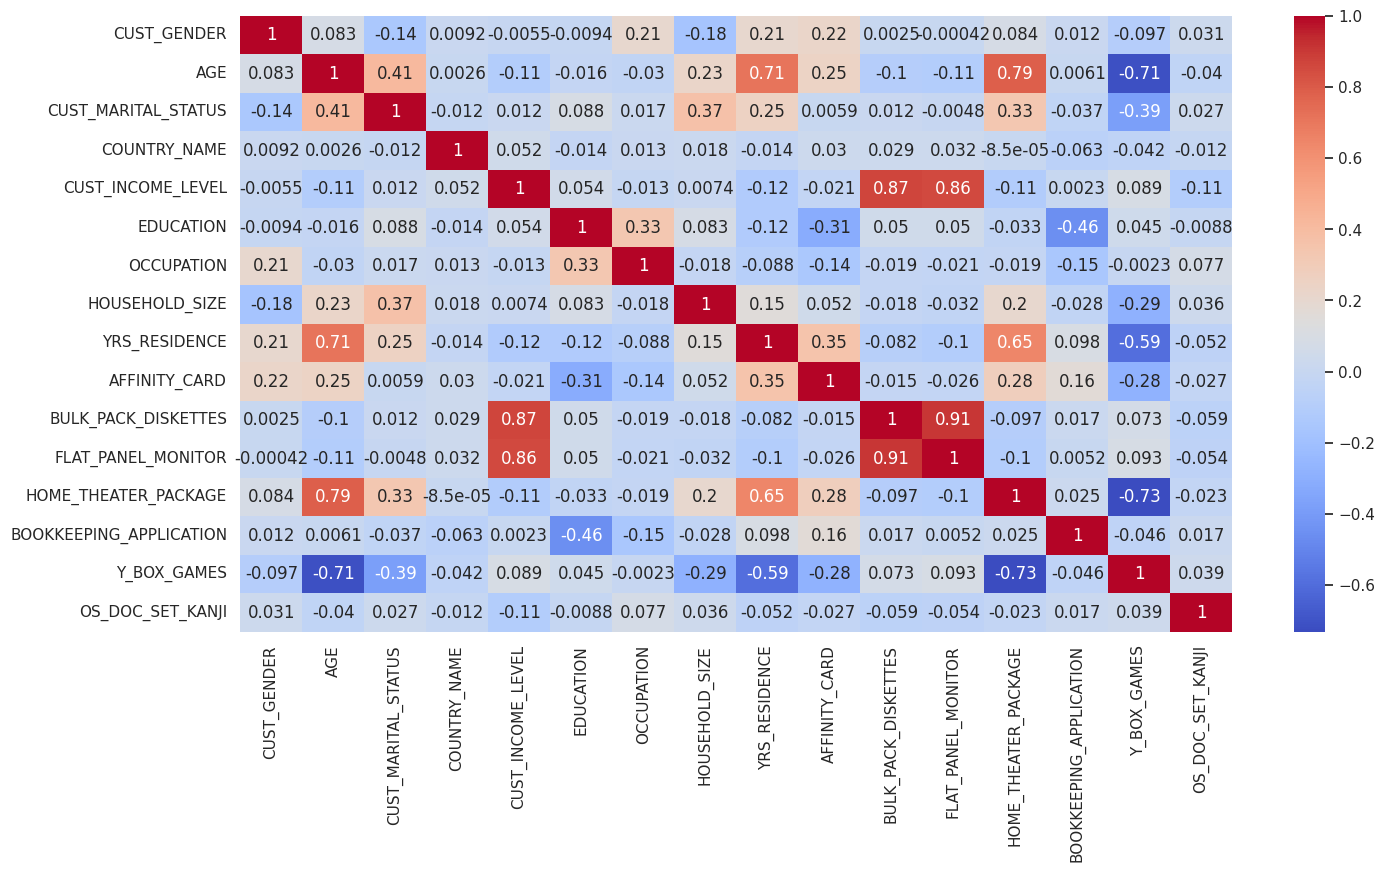

In [35]:
#visualization of the correlation
import seaborn as sns
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(ndf.corr(),annot = True, fmt = '.2g' , cmap= 'coolwarm')

In [36]:
#correlation of the variables to the target variable with threshold set to 0.1
c_target = abs(cor_mat['AFFINITY_CARD'])
relevant_features = c_target[c_target>0.1]
relevant_features

CUST_GENDER                0.224247
AGE                        0.247680
EDUCATION                  0.311796
OCCUPATION                 0.144079
YRS_RESIDENCE              0.351373
AFFINITY_CARD              1.000000
HOME_THEATER_PACKAGE       0.280422
BOOKKEEPING_APPLICATION    0.163681
Y_BOX_GAMES                0.278286
Name: AFFINITY_CARD, dtype: float64

In [37]:
#correlation between target variable and residence years
ndf[['AFFINITY_CARD','YRS_RESIDENCE']].corr()

,AFFINITY_CARD,YRS_RESIDENCE
AFFINITY_CARD,1.000000,0.351373
YRS_RESIDENCE,0.351373,1.000000


4.	Data exploration	

In [38]:
list(ndf.columns.values)

['CUST_GENDER',
 'AGE',
 'CUST_MARITAL_STATUS',
 'COUNTRY_NAME',
 'CUST_INCOME_LEVEL',
 'EDUCATION',
 'OCCUPATION',
 'HOUSEHOLD_SIZE',
 'YRS_RESIDENCE',
 'AFFINITY_CARD',
 'BULK_PACK_DISKETTES',
 'FLAT_PANEL_MONITOR',
 'HOME_THEATER_PACKAGE',
 'BOOKKEEPING_APPLICATION',
 'Y_BOX_GAMES',
 'OS_DOC_SET_KANJI']

Enter variable for the x axis AGE


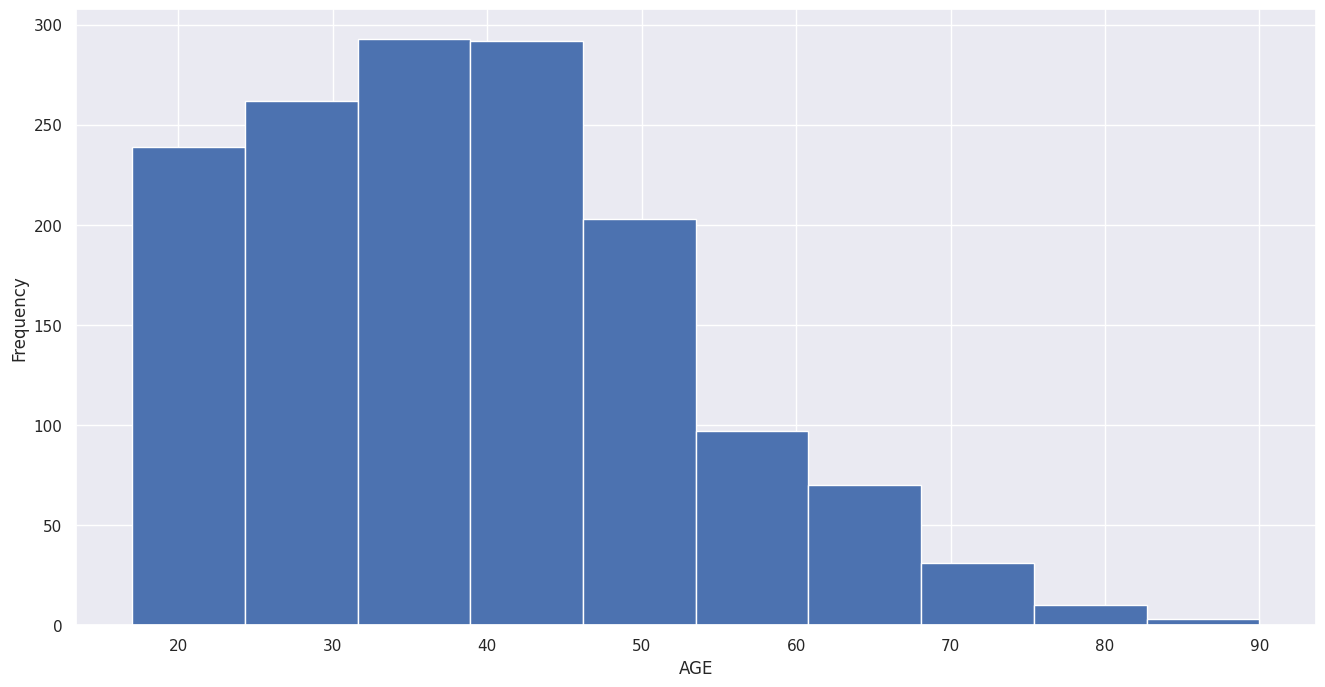

Enter variable for the x axisexit
Enter variable for the x axis exit


In [39]:
#Write a Python program to show histogram plot of any user chosen variables. Program should be continuing running until user chose exit.

#loading the data
data = pd.read_csv('/content/drive/MyDrive/File/Marketing Campaign data.csv')

import matplotlib.pyplot as plt
while True:
  #ask user for a variable to plot
  x = input("Enter variable for the x axis ")
  if x == 'exit':
    break
  #generate histogram
  plt.hist(data[x])
  plt.xlabel(x)
  plt.ylabel("Frequency")
  plt.show()   
  #Enter exit below to stop the program from running
  x = input("Enter variable for the x axis") 


Enter variable for the x axisOCCUPATION
Enter variable for the y axisAGE


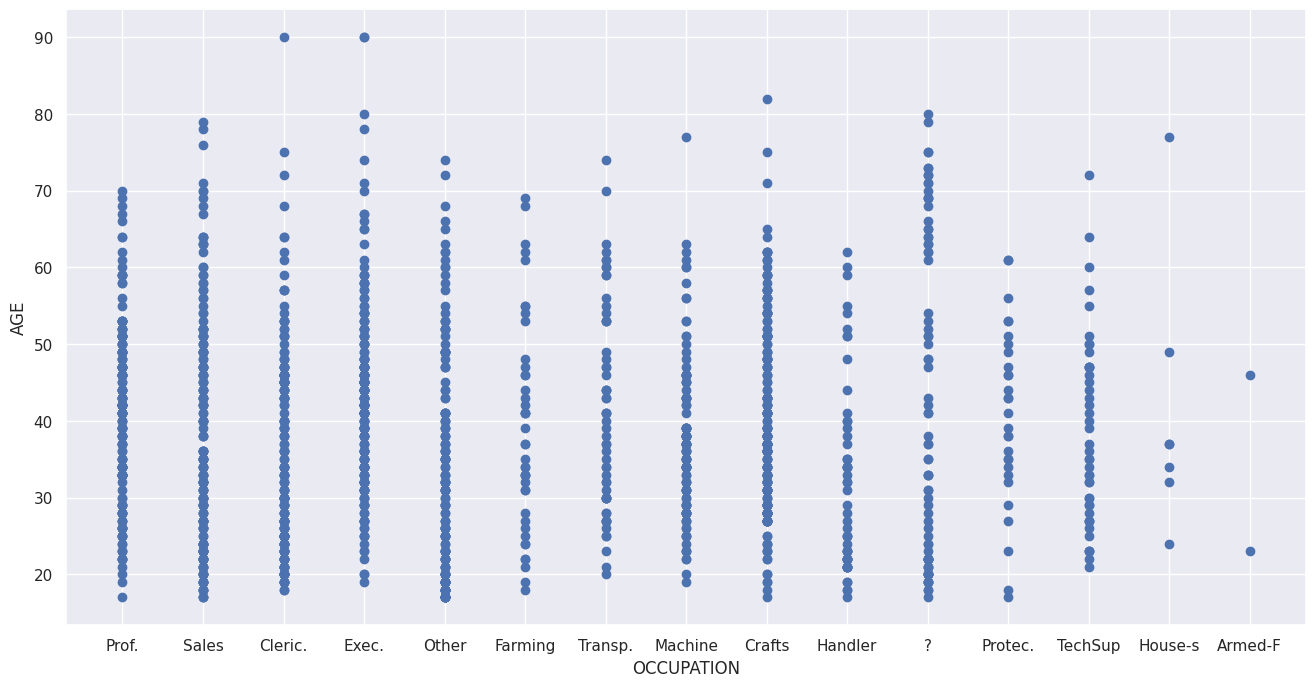

Enter variable for the x axisexit
Enter variable for the x axisexit


In [41]:
#	Write a Python program to show scatter plot for any two user chosen variables. Program should be continuing running until user chose exit.

#loading the data
data = pd.read_csv('/content/drive/MyDrive/File/Marketing Campaign data.csv')

import matplotlib.pyplot as plt
while True:
  #ask user for two variables to plot
  x = input("Enter variable for the x axis")
  if x.lower() =="exit":
    break
  y = input("Enter variable for the y axis")
  if y.lower() =="exit":
    break
  plt.scatter(data[x],data[y])
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()
#Enter exit below to stop the program from running
  x = input("Enter variable for the x axis") 

DATA MINING


In [42]:
#Build two Predictive Models to predict AFFINITY_CARD taken in the marketing campaign	with Python using the prepared data

#Decision trees
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from mlxtend.plotting import plot_decision_regions

Decision Trees

In [43]:
#splitting the dataset
x = ndf.drop('AFFINITY_CARD', axis = 1)
y = ndf['AFFINITY_CARD']


In [44]:
#Checking for data imbalance
ndf['AFFINITY_CARD'].value_counts()

0    1050
1     370
Name: AFFINITY_CARD, dtype: int64

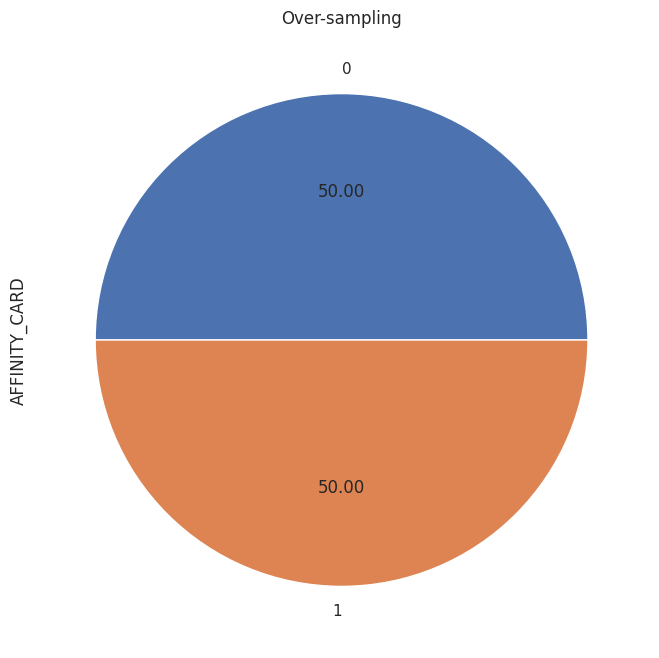

In [45]:
#Random oversampling to balance the data
from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy=1)
ros = RandomOverSampler(sampling_strategy="not majority")
x_res, y_res = ros.fit_resample(x, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [46]:
#checking results of the oversampling
y_res.value_counts()

0    1050
1    1050
Name: AFFINITY_CARD, dtype: int64

In [47]:
#split the dataset into training and testing sets
x_train, x_test,y_train,y_test = train_test_split(x_res,y_res, test_size =0.2 , random_state=30)

In [48]:
#creating and training the Decision Tree Clasifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=None,random_state=30)
dt.fit(x_res ,y_res)

DecisionTreeClassifier(random_state=30)

In [49]:
#predicting the response for test dataset
y_pred = dt.predict(x_test)

In [50]:
#Model accuracy
accuracy = accuracy_score(y_test,y_pred)
print ('Accuracy:{0}'.format(accuracy))

Accuracy:1.0


In [51]:
#VISUALIZATION DECISION TREE

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import graphviz
from six import StringIO

#DOT file
dot_data = export_graphviz(dt,
out_file=None,feature_names=None,filled=True)

In [52]:
#PyDotplus - provides interface to Graphviz's Dot language
import pydotplus
from IPython.display import Image
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

Random forest

In [53]:
#splitting the dataset
x = ndf.drop('AFFINITY_CARD', axis = 1)
y = ndf['AFFINITY_CARD']

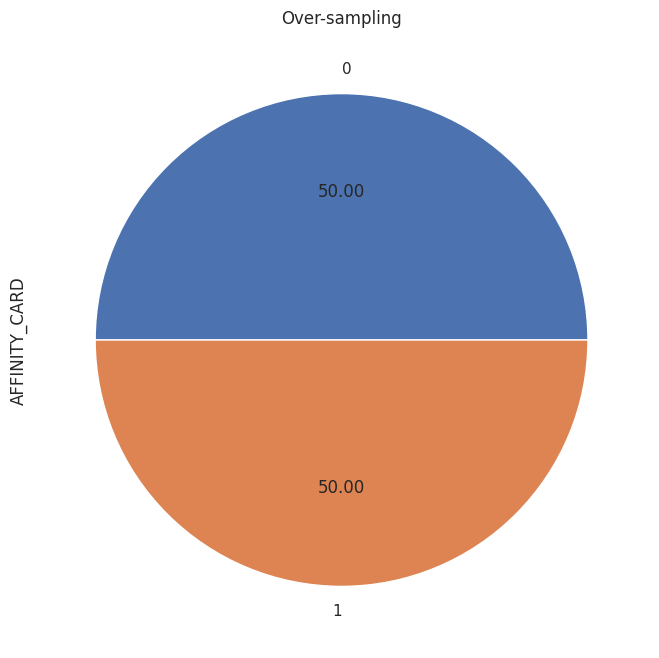

In [54]:
#Random oversampling to balance the data
from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy=1)
ros = RandomOverSampler(sampling_strategy="not majority")
x_res, y_res = ros.fit_resample(x, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [55]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x_res,y_res, test_size =0.2 , random_state=30)

In [56]:
#Model building and training 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30,max_features="auto")
rf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=30)

In [57]:
#making prediction with the model
predict = rf.predict(x_test)


In [58]:
#Model accuracy
accuracy = accuracy_score(y_test,predict)
print ('Accuracy:{0}'.format(accuracy))

Accuracy:0.9


In [ ]:
#ROC CURVE

In [59]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [60]:
#probabilities
dt_prob =dt.predict_proba(x_test)[:,1]
rf_prob =rf.predict_proba(x_test)[:,1]

In [61]:
#calculating the ROC curve and AUC for each classifier
fpr_dt2 , tpr_dt2,_ = roc_curve(y_test,dt_prob )
auc_dt2 = roc_auc_score(y_test,dt_prob)

fpr_rf2 , tpr_rf2,_ = roc_curve(y_test,rf_prob )
auc_rf2 = roc_auc_score(y_test,rf_prob)

In [62]:
#The AUC scores
print("AUC for Decision tree:{0}".format(auc_dt2))
print("AUC for Random afaorest:{0}".format(auc_rf2))

AUC for Decision tree:1.0
AUC for Random afaorest:0.9579003615361877


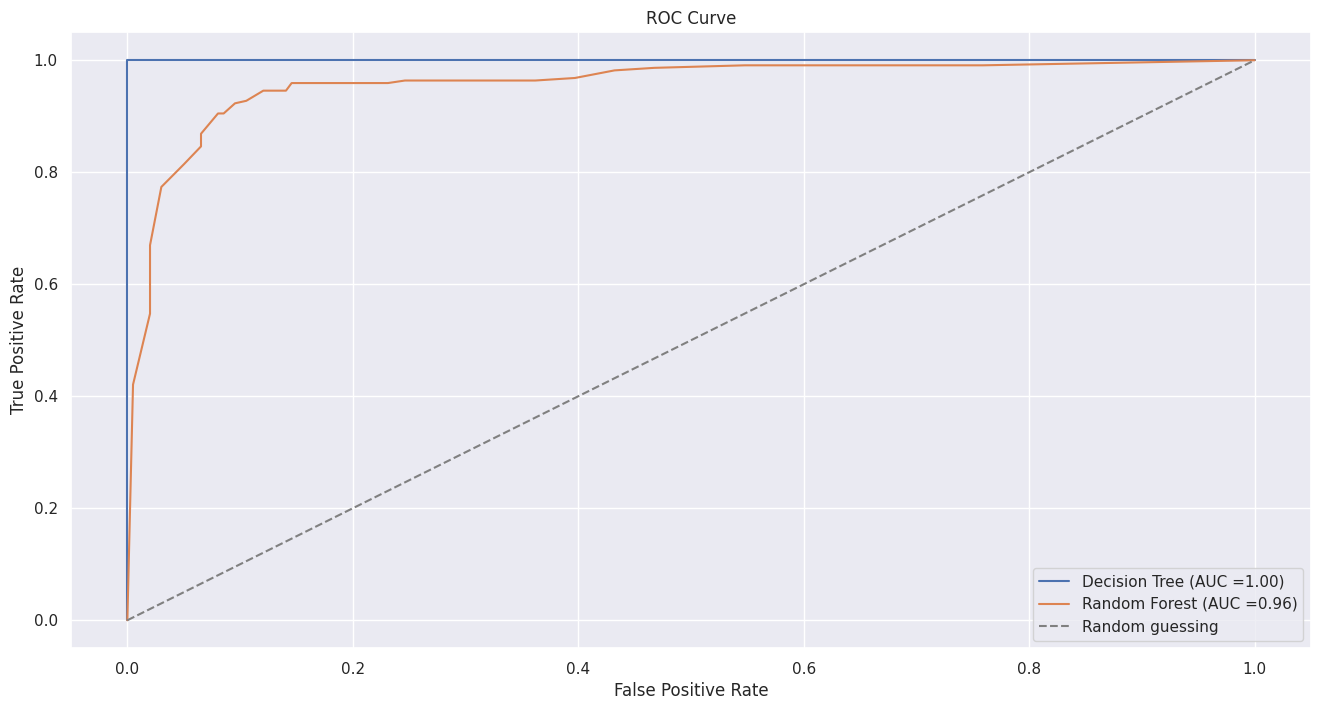

In [63]:
#Plotting the ROC curves for each calssifier
plt.plot(fpr_dt2,tpr_dt2, label = f"Decision Tree (AUC ={auc_dt2:.2f})")
plt.plot(fpr_rf2,tpr_rf2, label = f"Random Forest (AUC ={auc_rf2:.2f})")

#adding labels and legends
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.plot([0,1],[0,1], linestyle='--',color ='gray', label = 'Random guessing')
plt.legend()

plt.show()